 ## PCA Analysis Results
 The goal of this notebook is to document the PCA results on the simulated datasetsself.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from src.models.encoders.levelbinary import LevelBinary
from src.models.encoders.levelmulti import LevelMulti
from src.models.pipelines.pipelines import pca_pipeline

mpl.style.use('seaborn-notebook')
plt.rcParams["figure.figsize"] = (9, 9)


In [2]:
def load_data(filename):
    df = pd.read_csv(filename, index_col=0)
    ylevel = df['level'].values.copy()  
    #blexps = dfFile['blexp'].values.copy()       
    dfData = df.drop(['level', 'blexp'], axis=1).copy()
    return ylevel, dfData.values.copy()

def plot_data(title, y, X):
    ylabels = LevelMulti(targetmin=0.2, targetmax=0.8).transform(y)
    ylabel0 = np.nonzero(ylabels == 0)[0]
    ylabel1 = np.nonzero(ylabels == 1)[0]
    ylabel2 = np.nonzero(ylabels == 2)[0]  

    fig, axs = plt.subplots()
    l = axs.scatter(X[ylabel0, 0], X[ylabel0, 1], s=10, c='black', marker='o')
    n = axs.scatter(X[ylabel1, 0], X[ylabel1, 1], s=10, c='blue', marker='o')
    h = axs.scatter(X[ylabel2, 0], X[ylabel2, 1], s=10, c='red', marker='o')    
    plt.legend((l, n, h), ('low', 'norm', 'high'), scatterpoints=1)
    fig.suptitle(title)       
    plt.show()      


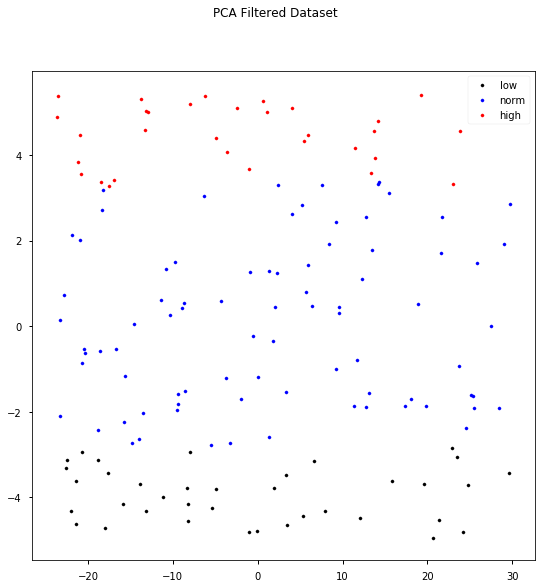

In [3]:
ydata, Xdata = load_data('./data/processed/ds0001-filtered-train.csv')
ppca = pca_pipeline(ncomponents=2)
Xpca = ppca.fit_transform(Xdata)
plot_data('PCA Filtered Dataset', ydata, Xpca)


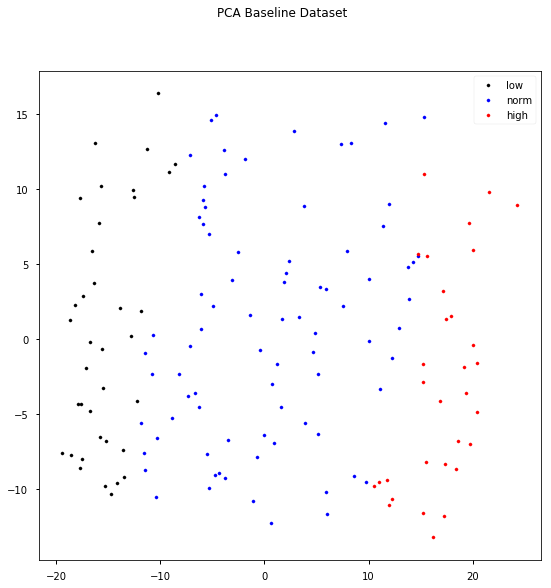

In [4]:
ydata, Xdata = load_data('./data/processed/ds0001-baseline-train.csv')
ppca = pca_pipeline(ncomponents=2)
Xpca = ppca.fit_transform(Xdata)
plot_data('PCA Baseline Dataset', ydata, Xpca)
